In [195]:
# Libraries

import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [196]:
# Inputs

ATTRIBUTES = pd.read_csv('Hotel-A-data-dictionary.csv')
TRAIN = pd.read_csv('Hotel-A-train.csv')
TEST = pd.read_csv('Hotel-A-test.csv')
VALIDATION = pd.read_csv('Hotel-A-validation.csv')

visualizing Dataframes

In [197]:
ATTRIBUTES

,Data Field,Description
0,Reservation-id,A unique booking id
1,Gender,Gender of the reservation person
2,Age,Age of the reservation person. Age is varying ...
3,Ethnicity,Ethnicity of the reservation person. This fiel...
4,Educational_Level,Educational level of the reservation person. T...
5,Income,Income of the reservation person. This field t...
6,Country_region,Country region of the reservation person. This...
7,Hotel_Type,Hotel type of the reservation; i.e City Hotels...
8,Expected_checkin,Expected check-in date
9,Expected_checkout,Expected checkout date


In [198]:
TRAIN.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [199]:
TEST.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,62931593,F,52,Latino,Grad,25K --50K,South,City Hotel,11/18/2016,11/19/2016,...,0,HB,No,No,No Deposit,Direct,Yes,Yes,10,153
1,70586099,F,47,Latino,Grad,25K --50K,East,Airport Hotels,11/18/2016,11/19/2016,...,0,FB,No,No,No Deposit,Online,No,No,0,210
2,4230648,F,28,Asian American,Grad,<25K,East,City Hotel,4/28/2017,5/1/2017,...,0,BB,No,No,No Deposit,Agent,No,Yes,5,117
3,25192322,F,65,caucasian,High-School,25K --50K,South,Airport Hotels,11/18/2016,11/20/2016,...,2,FB,No,No,No Deposit,Online,Yes,Yes,10,107
4,80931528,M,45,African American,College,25K --50K,South,City Hotel,11/18/2016,11/20/2016,...,0,BB,No,No,Refundable,Agent,No,No,0,119


In [200]:
VALIDATION.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,...,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,...,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,...,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,...,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218


In [201]:
# Shapes

print ("Train data shape : ", TRAIN.shape)
print ("Test data shape : ", TEST.shape)
print ("Validation data shape : ", VALIDATION.shape)

print ('\n')

TOTAL_RECORD = TRAIN.shape[0] + TEST.shape[0] + VALIDATION.shape[0]

print ("Percentage of Train data : ", TRAIN.shape[0]/TOTAL_RECORD)
print ("Percentage of Test data : ", TEST.shape[0]/TOTAL_RECORD)
print ("Percentage of Validation data : ", VALIDATION.shape[0]/TOTAL_RECORD)

print ('\n')

print ("Therefore, 80% data to training, 12% data to testing and 8% data to validation => Data is distributed perfectly")

Train data shape :  (27499, 24)
Test data shape :  (4318, 23)
Validation data shape :  (2749, 24)


Percentage of Train data :  0.7955505409940404
Percentage of Test data :  0.12492044205288434
Percentage of Validation data :  0.07952901695307528


Therefore, 80% data to training, 12% data to testing and 8% data to validation => Data is distributed perfectly


In [202]:
# checking number of nulls

print (TRAIN.isnull().sum().sum())
print (TEST.isnull().sum().sum())
print (VALIDATION.isnull().sum().sum())

print ('\n')

print ("Therefore no nan values in all 3 data => No need to fill nan values")

0
0
0


Therefore no nan values in all 3 data => No need to fill nan values


In [203]:
#print (TRAIN.describe())
print (TEST.describe())
#print (VALIDATION.describe())

       Reservation-id          Age       Adults     Children       Babies  \
count    4.318000e+03  4318.000000  4318.000000  4318.000000  4318.000000   
mean     5.042908e+07    43.788328     2.369847     1.730199     0.345762   
std      2.879425e+07    15.257078     1.191075     0.721406     0.566368   
min      6.831800e+04    18.000000     1.000000     1.000000     0.000000   
25%      2.547685e+07    31.000000     2.000000     1.000000     0.000000   
50%      5.112349e+07    44.000000     2.000000     2.000000     0.000000   
75%      7.515864e+07    57.000000     3.000000     2.000000     1.000000   
max      9.998367e+07    70.000000     5.000000     3.000000     2.000000   

       Discount_Rate    Room_Rate  
count    4318.000000  4318.000000  
mean       12.416628   175.572024  
std        11.266842    42.941781  
min         0.000000   100.000000  
25%         5.000000   139.000000  
50%        10.000000   176.000000  
75%        20.000000   212.000000  
max        40.0000

In [204]:
# Display information in order to change cateogorical data to numerical data

print (TRAIN.info())

print ('\n')

print (TEST.info())

print ('\n')

print (VALIDATION.info())

print ('\n')

TRAIN.select_dtypes(include=['object']).head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

,Gender,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion
0,F,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,BB,No,No,No Deposit,Online,Yes,Check-In,Yes
1,F,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,BB,No,No,Refundable,Online,Yes,Check-In,No
2,F,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,BB,No,No,No Deposit,Online,Yes,Check-In,No
3,M,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,BB,No,No,Refundable,Agent,Yes,Check-In,Yes
4,F,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,BB,No,No,No Deposit,Direct,No,Check-In,Yes
5,M,African American,College,>100K,North,Airport Hotels,7/3/2015,7/4/2015,6/20/2015,BB,Yes,No,No Deposit,Online,No,Check-In,Yes
6,F,African American,High-School,<25K,East,Airport Hotels,7/3/2015,7/4/2015,7/4/2015,BB,Yes,Yes,Refundable,Online,Yes,Check-In,Yes


In [205]:
# Finding cateogorical columns and dropping unnecessary(date) columns in data

OBJECT_COLUMNS = []

for col in TRAIN.select_dtypes(include=['object']).columns:
    #print ()
    print ("Unique records in ", col, "are : ", len(TRAIN[col].unique()))
    
print ('\n')

print ("So many unique records in the date => Better to drop Expected_checkin, Expected_checkout, Booking_date columns in data")

print ('\n')

TRAIN.drop(["Expected_checkin", "Expected_checkout", "Booking_date"], inplace=True, axis=1)
TEST.drop(["Expected_checkin", "Expected_checkout", "Booking_date"], inplace=True, axis=1)
VALIDATION.drop(["Expected_checkin", "Expected_checkout", "Booking_date"], inplace=True, axis=1)

Unique records in  Gender are :  2
Unique records in  Ethnicity are :  4
Unique records in  Educational_Level are :  4
Unique records in  Income are :  4
Unique records in  Country_region are :  4
Unique records in  Hotel_Type are :  3
Unique records in  Expected_checkin are :  901
Unique records in  Expected_checkout are :  929
Unique records in  Booking_date are :  1133
Unique records in  Meal_Type are :  3
Unique records in  Visted_Previously are :  2
Unique records in  Previous_Cancellations are :  2
Unique records in  Deposit_type are :  3
Unique records in  Booking_channel are :  3
Unique records in  Required_Car_Parking are :  2
Unique records in  Reservation_Status are :  3
Unique records in  Use_Promotion are :  2


So many unique records in the date => Better to drop Expected_checkin, Expected_checkout, Booking_date columns in data




In [206]:
# Separate data into X and y

TRAIN_y = TRAIN["Reservation_Status"]
TRAIN_X = TRAIN.drop(["Reservation_Status"], axis = 1)
VALIDATION_y = VALIDATION ["Reservation_Status"]
VALIDATION_X = VALIDATION.drop(["Reservation_Status"], axis = 1)

#  Reservation_Status : 
check-in as class 1, cancel as class 2 and no-show as class 3

In [207]:
# Cateogorical -> Numerical ; Label Encoder

TRAIN_X_ENCODED = TRAIN_X.apply(LabelEncoder().fit_transform)
TEST_ENCODED = TEST.apply(LabelEncoder().fit_transform)
VALIDATION_X_ENCODED = VALIDATION_X.apply(LabelEncoder().fit_transform)

### definition for changing y from cateogorical to numerical .....
def y_encoding(Y, a, b, c):
    LIST = []
    for i in range(len(Y)):
        if Y[i] == a:
            LIST.append(1)
        elif Y[i] == b:
            LIST.append(2)
        elif Y[i] == c:
            LIST.append(3)
    return (pd.Series(LIST))
            
a, b, c = TRAIN["Reservation_Status"].unique()
TRAIN_y_ENCODED = y_encoding(TRAIN_y, a, b, c)
VALIDATION_y_ENCODED = y_encoding(VALIDATION_y, a, b, c)

In [208]:
# Normalizing all X {0 - 1}

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
TRAIN_X_ENCODED_NORMALIZED = pd.DataFrame(scaler.fit_transform(TRAIN_X_ENCODED), columns=TRAIN_X_ENCODED.columns)
TEST_ENCODED_NORMALIZED = pd.DataFrame(scaler.fit_transform(TEST_ENCODED), columns=TEST_ENCODED.columns)
VALIDATION_X_ENCODED_NORMALIZED = pd.DataFrame(scaler.fit_transform(VALIDATION_X_ENCODED), columns=VALIDATION_X_ENCODED.columns)

X_TRAIN = TRAIN_X_ENCODED_NORMALIZED.drop("Reservation-id", axis = 1)
X_VALIDATION = VALIDATION_X_ENCODED_NORMALIZED.drop("Reservation-id", axis = 1)
X_TEST = TEST_ENCODED_NORMALIZED.drop("Reservation-id", axis = 1)

# Train : 
X = X_TRAIN, Y = TRAIN_y_ENCODED

# Validation :
X = X_VALIDATION, Y = VALIDATION_y_ENCODED

# Test :
X = X_TEST

In [188]:
X_TEST

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,0.0,0.653846,0.666667,0.333333,0.000000,0.666667,0.5,0.50,1.0,0.0,1.0,0.0,0.0,0.0,0.5,1.0,1.0,0.285714,0.353333
1,0.0,0.557692,0.666667,0.333333,0.000000,0.000000,0.0,0.25,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.733333
2,0.0,0.192308,0.333333,0.333333,0.666667,0.000000,0.5,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,0.113333
3,0.0,0.903846,1.000000,0.666667,0.000000,0.666667,0.0,0.00,1.0,1.0,0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.285714,0.046667
4,1.0,0.519231,0.000000,0.000000,0.000000,0.666667,0.5,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.126667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,1.0,0.673077,0.666667,0.000000,0.333333,0.666667,1.0,0.50,1.0,0.5,0.5,1.0,0.0,0.5,1.0,1.0,0.0,0.000000,0.353333
4314,0.0,0.865385,1.000000,0.000000,0.333333,0.666667,1.0,0.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.000000,0.886667
4315,0.0,0.788462,1.000000,0.333333,0.666667,0.000000,0.0,0.25,1.0,0.0,0.5,0.0,0.0,0.0,0.5,1.0,0.0,0.000000,0.946667
4316,1.0,0.480769,0.000000,0.000000,0.000000,1.000000,1.0,0.75,0.5,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.720000


X_TRAIN.to_csv("X_TRAIN.csv")
TRAIN_y_ENCODED.to_csv("TRAIN_y_ENCODED.csv")
X_VALIDATION.to_csv("X_VALIDATION.csv")
VALIDATION_y_ENCODED.to_csv("VALIDATION_y_ENCODED.csv")
X_TEST.to_csv("X_TEST.csv")

In [189]:
X_TRAIN.to_csv("X_TRAIN.csv")
TRAIN_y_ENCODED.to_csv("TRAIN_y_ENCODED.csv")
X_VALIDATION.to_csv("X_VALIDATION.csv")
VALIDATION_y_ENCODED.to_csv("VALIDATION_y_ENCODED.csv")
X_TEST.to_csv("X_TEST.csv")

### ... It is an IMBALANCED data ...

# Classification with under, over sampling technique & Classifier = RFC

In [114]:
# Oversampling <- Builtin _ RFC 

import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_TRAIN, TRAIN_y_ENCODED)

print('original dataset shape:', X_TRAIN.shape)
print('Resample dataset shape', X_ros.shape)

#X_ros
y_ros.value_counts()

rfc = RandomForestClassifier()# define model

rfc.fit(X_ros, y_ros)# fit model

rfc_predict = rfc.predict(X_VALIDATION)# check performance

cm = confusion_matrix(VALIDATION_y_ENCODED, rfc_predict)
accuracies = cross_val_score(estimator = rfc, X = X_VALIDATION, y = VALIDATION_y_ENCODED, cv = 10)

print(cm)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

#print('ROCAUC score:',roc_auc_score(VALIDATION_y_ENCODED, rfc_predict)*100)
print('Accuracy score:',accuracy_score(VALIDATION_y_ENCODED, rfc_predict)*100)
print('F1 score:',f1_score(VALIDATION_y_ENCODED, rfc_predict, average = 'macro'))

TEST_PREDICT = rfc.predict(X_TEST)
TEST_OUTPUT = pd.DataFrame(TEST["Reservation-id"])
TEST_OUTPUT["Reservation_Status"] = TEST_PREDICT
TEST_OUTPUT.to_csv("TEST_OUTPUT.csv")

original dataset shape: (27499, 19)
Resample dataset shape (63720, 19)
[[1589   21    0]
 [ 726   13    2]
 [ 391    7    0]]
Accuracy: 57.73 %
Standard Deviation: 1.02 %
Accuracy score: 58.27573663150236
F1 score: 0.25652600565551603


In [115]:
# Undersampling <- Builtin _ RFC

import imblearn
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_TRAIN, TRAIN_y_ENCODED)

print('original dataset shape:', X_TRAIN.shape)
print('Resample dataset shape', X_ros.shape)

#X_ros
y_ros.value_counts()

rfc = RandomForestClassifier()# define model

rfc.fit(X_ros, y_ros)# fit model

rfc_predict = rfc.predict(X_VALIDATION)# check performance

cm = confusion_matrix(VALIDATION_y_ENCODED, rfc_predict)
accuracies = cross_val_score(estimator = rfc, X = X_VALIDATION, y = VALIDATION_y_ENCODED, cv = 10)

print(cm)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

#print('ROCAUC score:',roc_auc_score(VALIDATION_y_ENCODED, rfc_predict)*100)
print('Accuracy score:',accuracy_score(VALIDATION_y_ENCODED, rfc_predict)*100)
print('F1 score:',f1_score(VALIDATION_y_ENCODED, rfc_predict, average = 'macro'))

TEST_PREDICT = rfc.predict(X_TEST)
TEST_OUTPUT = pd.DataFrame(TEST["Reservation-id"])
TEST_OUTPUT["Reservation_Status"] = TEST_PREDICT
TEST_OUTPUT.to_csv("TEST_OUTPUT.csv")

original dataset shape: (27499, 19)
Resample dataset shape (6375, 19)
[[535 551 524]
 [215 269 257]
 [130 126 142]]
Accuracy: 57.59 %
Standard Deviation: 1.01 %
Accuracy score: 34.41251364132412
F1 score: 0.3212056089763722


 # Things need to consider ...
## 1. Feature selection
## 2. Suitable under { Over } sampling technique
## 3. Suitable classifier {RFC, DTC, SVM, NB, XGBoost, ...}

# Classification with out under/over sampling technique

Importance of each feature is 

Feature: 0, Score: 0.02801
Feature: 1, Score: 0.14717
Feature: 2, Score: 0.05499
Feature: 3, Score: 0.05425
Feature: 4, Score: 0.05606
Feature: 5, Score: 0.05599
Feature: 6, Score: 0.04159
Feature: 7, Score: 0.06102
Feature: 8, Score: 0.04073
Feature: 9, Score: 0.03156
Feature: 10, Score: 0.04355
Feature: 11, Score: 0.02404
Feature: 12, Score: 0.01311
Feature: 13, Score: 0.02989
Feature: 14, Score: 0.04064
Feature: 15, Score: 0.02613
Feature: 16, Score: 0.01475
Feature: 17, Score: 0.07213
Feature: 18, Score: 0.16440


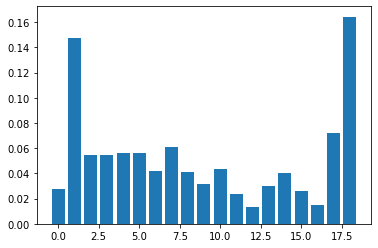

Confusion matrix is : 

[[1608    2    0]
 [ 740    1    0]
 [ 396    2    0]]


Accuracy is :  0.5853037468170244


Macro F1 score is :  0.2471040363077638


In [32]:
# 1. Random Forest Classifier

model1 = RandomForestClassifier()
model1.fit(X_TRAIN, TRAIN_y_ENCODED)

importance1 = model1.feature_importances_
# summarize feature importance
print ("Importance of each feature is \n")
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

VALIDATE1 = model1.predict(X_VALIDATION)
cm1 = confusion_matrix(VALIDATION_y_ENCODED, VALIDATE1)
print ("Confusion matrix is : \n")
print(cm1)
print ('\n')
print("Accuracy is : ", accuracy_score(VALIDATION_y_ENCODED, VALIDATE1))
print ('\n')
print ("Macro F1 score is : ", f1_score(VALIDATION_y_ENCODED, VALIDATE1, average='macro'))

Importance of each feature is 

Feature: 0, Score: 0.02717
Feature: 1, Score: 0.15494
Feature: 2, Score: 0.04749
Feature: 3, Score: 0.05027
Feature: 4, Score: 0.05782
Feature: 5, Score: 0.05498
Feature: 6, Score: 0.03245
Feature: 7, Score: 0.06425
Feature: 8, Score: 0.03534
Feature: 9, Score: 0.03458
Feature: 10, Score: 0.03210
Feature: 11, Score: 0.02221
Feature: 12, Score: 0.01065
Feature: 13, Score: 0.02853
Feature: 14, Score: 0.04211
Feature: 15, Score: 0.02475
Feature: 16, Score: 0.01530
Feature: 17, Score: 0.07645
Feature: 18, Score: 0.18860


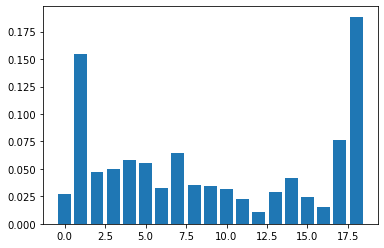

Confusion matrix is : 

[[1120  305  185]
 [ 526  141   74]
 [ 268   96   34]]


Accuracy is :  0.4710803928701346


Macro F1 score is :  0.3179489236144765


In [33]:
### 2. Decision Tree Classifier 

model2 = DecisionTreeClassifier()
model2.fit(X_TRAIN, TRAIN_y_ENCODED)
importance2 = model2.feature_importances_
# summarize feature importance
print ("Importance of each feature is \n")
for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance2))], importance2)
plt.show()

VALIDATE2 = model2.predict(X_VALIDATION)
cm2 = confusion_matrix(VALIDATION_y_ENCODED, VALIDATE2)
print ("Confusion matrix is : \n")
print(cm2)
print ('\n')
print("Accuracy is : ", accuracy_score(VALIDATION_y_ENCODED, VALIDATE2))
print ('\n')
print ("Macro F1 score is : ", f1_score(VALIDATION_y_ENCODED, VALIDATE2, average='macro'))

In [209]:
# 3. SVC

model3 = SVC()
model3.fit(X_TRAIN, TRAIN_y_ENCODED)

VALIDATE = model3.predict(X_VALIDATION)
cm = confusion_matrix(VALIDATION_y_ENCODED, VALIDATE)
print(cm)
print(accuracy_score(VALIDATION_y_ENCODED, VALIDATE))
print (f1_score(VALIDATION_y_ENCODED, VALIDATE, average='macro'))

[[1610    0    0]
 [ 741    0    0]
 [ 398    0    0]]
0.5856675154601674
0.2462338456832607


In [35]:
#4. XGBoost

import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_TRAIN, TRAIN_y_ENCODED)

# predict
xgb_y_predict = xgb_model.predict(X_VALIDATION)

cm2 = confusion_matrix(VALIDATION_y_ENCODED, xgb_y_predict)
print ("Confusion matrix is : \n")
print(cm2)
print ('\n')
xgb_score = accuracy_score(VALIDATION_y_ENCODED, xgb_y_predict)
print('\nAccuracy score is:', xgb_score*100)
print ('\n')
print ("Macro F1 score is : ", f1_score(VALIDATION_y_ENCODED, xgb_y_predict, average='macro'))

[19:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix is : 

[[1578   31    1]
 [ 719   16    6]
 [ 392    5    1]]



Accuracy score is: 58.02109858130229


Macro F1 score is :  0.2598011376138358
